**SVM** is a supervised machine learning algorithm which uses classification algo for 2-group classification.

**Hyperplane** is the decision boundary that differentiates between the two classes.
its' dimensions depends on the no. of input features.

**Support Vectors** are datapoints that are nearest to the hyperplaneand affect its position and orientation..

A margin must be sekected for ehich the distance between the margin and hyperplan is max.

complexity of solution increases with rising nuber of features.

**TO IDENTIFY THE BEST LINE:

1. Max Classification: selected line must be able to segregate all the datapoints into separate classes.
2. Best Separation: a line myst be able to perfectly separate the points.


In [1]:
# =============================
# Core libraries
# =============================
import numpy as np
import pandas as pd

# =============================
# Visualization (EDA, PCA plots)
# =============================
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# Preprocessing, splitting, pipelines
# =============================
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# =============================
# Dimensionality reduction (PCA)
# =============================
from sklearn.decomposition import PCA

# =============================
# Regression models (Employee Salary dataset)
# =============================
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# =============================
# Classification models (Loan approval dataset)
# =============================
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# =============================
# Evaluation metrics
# =============================
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# =============================
# Neural networks (TensorFlow / Keras)
# =============================
import tensorflow as tf
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics as keras_metrics
from keras.optimizers import SGD, Adam, RMSprop

# =============================
# Optional: ignore warnings for cleaner output
# =============================
import warnings
warnings.filterwarnings("ignore")


In [3]:
columns = [
    "ID", "Diagnosis", "radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1",
    "concavity1", "concave_points1", "symmetry1", "fractal_dimension1", "radius2", "texture2",
    "perimeter2", "area2", "smoothness2", "compactness2", "concavity2", "concave_points2",
    "symmetry2", "fractal_dimension2", "radius3", "texture3", "perimeter3", "area3",
    "smoothness3", "compactness3", "concavity3", "concave_points3", "symmetry3",
    "fractal_dimension3"
]

In [21]:
df = pd.read_csv('/content/wdbc.csv', header=None, names=columns)
df.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
df.shape

(569, 32)

In [23]:
df.describe()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [24]:
df.isnull().sum()

,0
ID,0
Diagnosis,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0


In [25]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
564,False
565,False
566,False
567,False


In [26]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
B,357
M,212


In [27]:
df.dtypes

,0
ID,int64
Diagnosis,object
radius1,float64
texture1,float64
perimeter1,float64
area1,float64
smoothness1,float64
compactness1,float64
concavity1,float64
concave_points1,float64


In [29]:
from sklearn.preprocessing import LabelEncoder
df['Diagnosis'] = LabelEncoder().fit_transform(df['Diagnosis'])

In [30]:
df.dtypes

,0
ID,int64
Diagnosis,int64
radius1,float64
texture1,float64
perimeter1,float64
area1,float64
smoothness1,float64
compactness1,float64
concavity1,float64
concave_points1,float64


In [32]:
df.drop('ID' , axis=1,inplace=True)

In [33]:
X = df.drop('Diagnosis',axis=1)
y = df['Diagnosis']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
scaler = StandardScaler()
X_trainscaled = scaler.fit_transform(X_train)
X_testscaled = scaler.transform(X_test)

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf',probability=True,random_state=42)
knn.fit(X_trainscaled, y_train)
svm.fit(X_trainscaled, y_train)

SVC(probability=True, random_state=42)

In [36]:

y_pred_knn = knn.predict(X_testscaled)
y_pred_svm = svm.predict(X_testscaled)


In [37]:
def get_metrics(y_true,y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

  accuracy = (tp + tn) / (tp + tn + fp + fn)
  sensitivity = tp / (tp + fn)
  specificity = tn / (tn + fp)
  gmean = (sensitivity * specificity) ** 0.5
  fdr = fp / (fp + tp)
  forate = fn / (fn + tn)
  mcc = ((tp * tn) - (fp * fn)) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

  return {
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'G-Mean': gmean,
        'FDR': fdr,
        'FOR': forate,
        'MCC': mcc
    }


In [39]:
metrics_knn = get_metrics(y_test, y_pred_knn)
metrics_svm = get_metrics(y_test, y_pred_svm)

metrics_results = pd.DataFrame([metrics_knn, metrics_svm], index=['KNN', 'SVM']).T

print("Metrics Results:")
print(metrics_results)


Metrics Results:
                  KNN       SVM
Accuracy     0.947368  0.982456
Sensitivity  0.930233  0.953488
Specificity  0.957746  1.000000
G-Mean       0.943889  0.976467
FDR          0.069767  0.000000
FOR          0.042254  0.027397
MCC          0.887979  0.962998


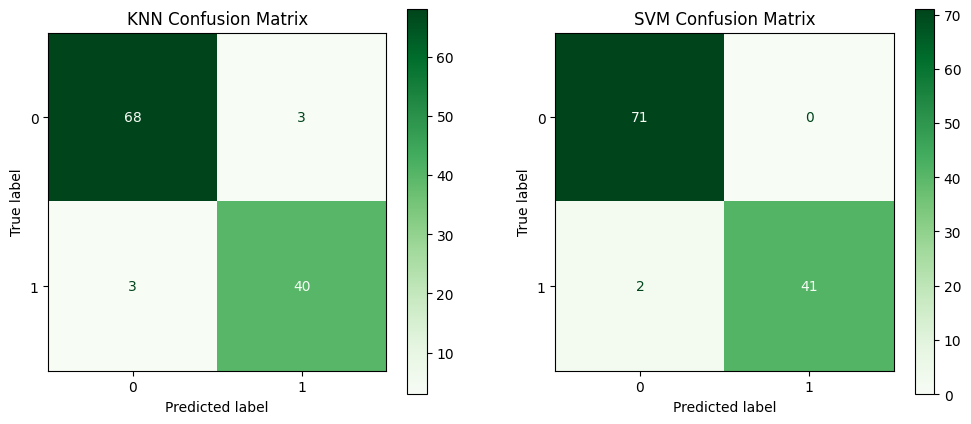

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap=plt.cm.Greens, ax=axes[0], values_format='d')
axes[0].set_title('KNN Confusion Matrix')

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap=plt.cm.Greens, ax=axes[1], values_format='d')
axes[1].set_title('SVM Confusion Matrix')
plt.show()

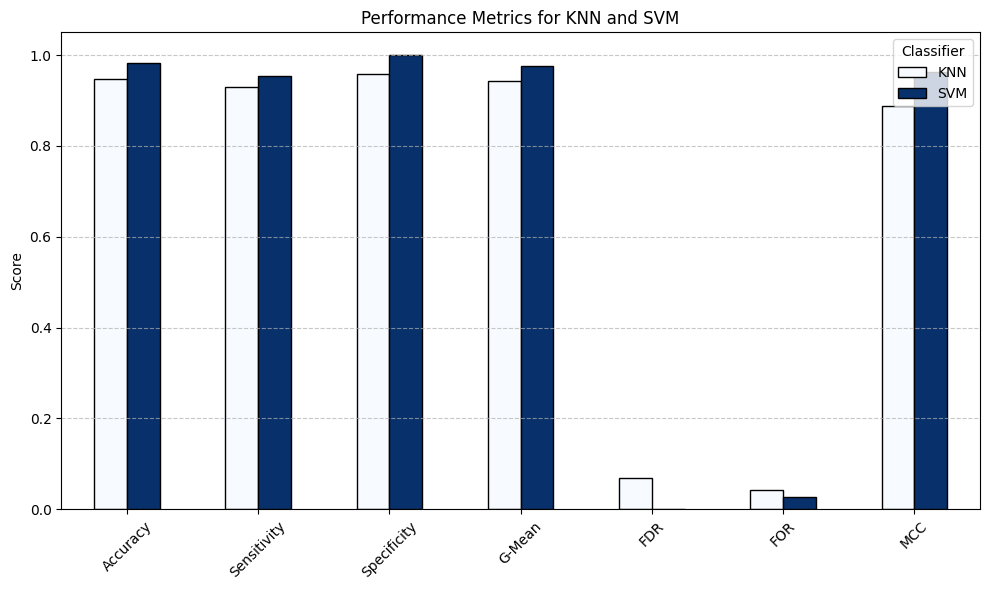

In [42]:
metrics_results.plot(kind='bar', figsize=(10, 6), colormap='Blues', edgecolor='black')
plt.title('Performance Metrics for KNN and SVM')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Classifier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [43]:
# task 2

df['Diagnosis'] = LabelEncoder().fit_transform(df['Diagnosis'])


X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [44]:
def calculate_f_scores(X, y):
    f_scores = []

    for i in range(X.shape[1]):
        feature = X[:, i]
        mean_pos = np.mean(feature[y == 1])
        mean_neg = np.mean(feature[y == 0])
        mean_total = np.mean(feature)
        numerator = (mean_pos - mean_total) ** 2 + (mean_neg - mean_total) ** 2
        denom_pos = np.var(feature[y == 1])
        denom_neg = np.var(feature[y == 0])
        denominator = (1 / len(feature[y == 1]) * denom_pos) + (1 / len(feature[y == 0]) * denom_neg)
        f_scores.append(numerator / denominator)

    return np.array(f_scores)

In [45]:
f_scores = calculate_f_scores(X_scaled, y)
print(f_scores)

[2.63796521e+02 6.49445644e+01 2.81341882e+02 2.06354517e+02
 4.62094142e+01 1.33815895e+02 2.21099639e+02 3.30160820e+02
 3.51848019e+01 4.71195742e-02 9.46342179e+01 2.30950810e-02
 8.80940053e+01 7.90474649e+01 1.40793159e+00 2.68208140e+01
 2.55630358e+01 6.16118649e+01 1.07913595e-02 2.21586885e+00
 3.29760609e+02 8.04184422e+01 3.43242945e+02 2.26368445e+02
 6.25877833e+01 1.22869441e+02 2.05329892e+02 4.53359281e+02
 4.85688993e+01 2.86768061e+01]


In [46]:
features_sorted = np.argsort(f_scores)[::-1]

In [ ]:
feature_subsets = [features_sorted[:i] for i in range(1, 10)]
print(feature_subsets)

[array([27]), array([27, 22]), array([27, 22,  7]), array([27, 22,  7, 20]), array([27, 22,  7, 20,  2]), array([27, 22,  7, 20,  2,  0]), array([27, 22,  7, 20,  2,  0, 23]), array([27, 22,  7, 20,  2,  0, 23,  6]), array([27, 22,  7, 20,  2,  0, 23,  6,  3])]

def evaluate_svm(X_train, X_test, y_train, y_test, features):
    X_train_sub = X_train[:, features]
    X_test_sub = X_test[:, features]

    model = SVC(kernel='rbf', C=1, gamma=0.1)
    model.fit(X_train_sub, y_train)
    y_pred = model.predict(X_test_sub)

    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    return accuracy, sensitivity, specificity, cm


def evaluate(X, y, splits, feature_subsets):
    results = []
    for split_name, test_size in splits.items():

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

        for i, features in enumerate(feature_subsets):
            accuracy, sensitivity, specificity, cm = evaluate_svm(X_train, X_test, y_train, y_test, features)
            results.append({
                'Split': split_name,
                'Model': f"Model #{i+1}",
                'Features': len(features),
                'Accuracy': accuracy,
                'Sensitivity': sensitivity,
                'Specificity': specificity,
                'Confusion Matrix': cm
            })
    return results


splits = {'50-50': 0.5, '70-30': 0.3, '80-20': 0.2}


results = evaluate(X_scaled, y, splits, feature_subsets)


results_df = pd.DataFrame(results)


table_4 = results_df.pivot_table(index=['Model'], columns='Split', values='Accuracy', aggfunc='mean')
print("\nTable 4:")
print(table_4)



model_5_results = results_df[results_df['Model'] == 'Model #5']


print("\nTable 6 and 7:")
for idx, res in model_5_results.iterrows():
    print(f"\n{res['Split']}:")
    print(f"Sensitivity: {res['Sensitivity']}, Specificity: {res['Specificity']}")
    print(f"Confusion Matrix:\n{res['Confusion Matrix']}")



for kernel in kernels:
    print(f"\nGrid Search for {kernel} kernel:")

    grid = GridSearchCV(SVC(kernel=kernel, random_state=42), param_grid[kernel], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    tuned_results[kernel] = {
        'best_params': grid.best_params_,
        'accuracy': accuracy,
        'report': classification_report(y_test, y_pred)
    }
    print(f"Best parameters for {kernel} kernel: {grid.best_params_}")
    print(f"Accuracy with {kernel} kernel (tuned): {accuracy:.4f}")



print("\nComparing Default Parameter Results and Tuned Results:")

for kernel in kernels:
    print(f"\n{kernel} Kernal:")
    print(f"Default Accuracy: {default_results[kernel]['accuracy']:.4f}")
    print(f"Tuned Accuracy: {tuned_results[kernel]['accuracy']:.4f}")



In [ ]:

Q3
EDA and Data Wrangling


sns.countplot(data=df, x="Diagnosis", palette="viridis")
plt.title("Diagnosis Distribution (B = Benign, M = Malignant)")
plt.show()


sns.countplot(data=df, x="Diagnosis", palette="viridis")


from sklearn.preprocessing import LabelEncoder
df['Diagnosis'] = LabelEncoder().fit_transform(df['Diagnosis'])


plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.2)
plt.title("Correlation Heatmap of WDBC Dataset")
plt.show()



df.hist(figsize=(18, 15), bins=30)
plt.show()



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


def svm_default(X_train, X_test, y_train, y_test, kernels):
    results = {}
    for kernel in kernels:
        print(f"\nSVM with {kernel} kernel:")

        model = SVC(kernel=kernel, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        results[kernel] = {
            'accuracy': accuracy,
            'report': classification_report(y_test, y_pred)
        }
        print(f"Accuracy with {kernel} kernel: {accuracy:.4f}")
    return results



kernels = ['linear', 'poly', 'rbf', 'sigmoid']

print("\nSVM with default parameters:")
default_results = svm_default(X_train, X_test, y_train, y_test, kernels)


print("\nGrid Search with tuned parameters:")
tuned_results = {}
param_grid = {
    'linear': {'C': [0.1, 1, 10, 100]},
    'poly': {'C': [0.1, 1, 10], 'degree': [2, 3, 4]},
    'rbf': {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1]},
    'sigmoid': {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1]}
}
